In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from fun_lib import *

In [2]:
bp = 4
m, n = 4,16
T = 0*np.pi/180
delta = 0*np.pi/180
c_r, c_t = 1,1
U_i = 100
rho = 1.0
dt = 0.1
alpha = 1*np.pi/180

In [3]:
X,PC = wing_panels(bp,T,delta,c_r,c_t, m, n)
XV = steady_wing_vortex_panels(X,alpha)

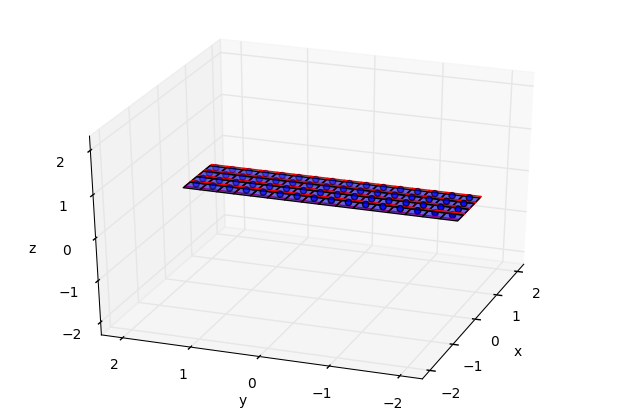

In [4]:
ax = plot_panels(X,transp=0.5,elev=30,azim=-160)
plot_panels(XV,ax=ax,edge_color='r',fill_color=0)
plot_control_points(PC,ax);

In [5]:
CLw, cl, cl_span = aerodynamic_steady_distributions(X,XV,PC,U_i,alpha,rho)

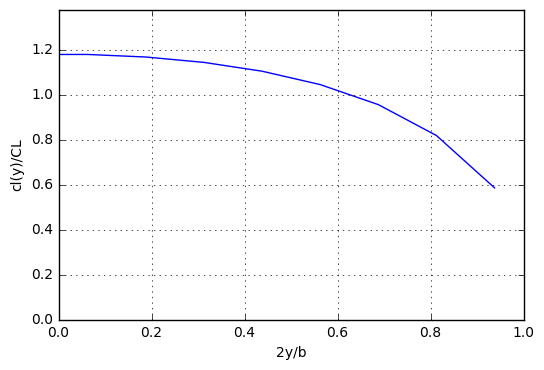

In [6]:
plot_spanwise_cl(PC,bp,cl_span,CLw)

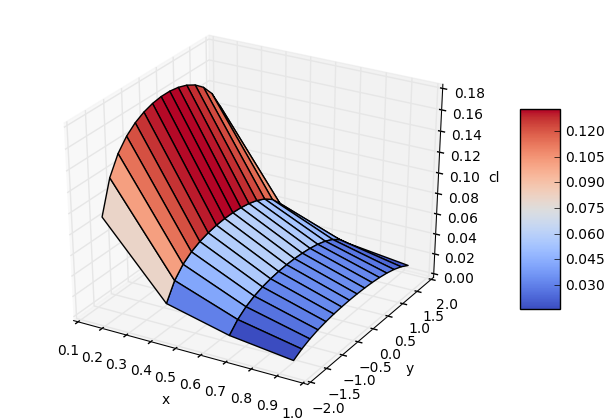

In [7]:
plot_cl_distribution(PC,cl)